# Jupyter notebook testings. Let's do some data cleaning.

First we need some modules. Let's also read our data while we are at it.

In [9]:
import pandas as pd
import numpy as np

nfl_data = pd.read_csv("C:/Users/Palmg/Desktop/machineLearning/sandbox/box4JupyterTesting/NFL Play by Play 2009-2016 (v3).csv")

C:\Users\Palmg\AppData\Local\Temp\ipykernel_3044\420226469.py:4: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("C:/Users/Palmg/Desktop/machineLearning/sandbox/box4JupyterTesting/NFL Play by Play 2009-2016 (v3).csv")


Let's inspect our nfl_data

In [10]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


There's a lot of missing values. Let's see how many we have in each column. 

In [11]:
missing_values_count = nfl_data.isnull().sum()
missing_values_count

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

Percent of data missing:

In [12]:
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

24.85847694188906

What if we drop all rows with missing values?

In [13]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Yeaah... Not very smart. We have 0 rows left.

Let's come up with a different approach, perhaps filling data could work?

In [14]:
nfl_data.fillna(method='bfill', axis=0).fillna(0) # Fills all values with the value that comes right after them and then anything that remains gets assigned with a 0

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,1.0,15:00,15,3600.0,0.0,TEN,...,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,...,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,2017-01-01,2017010102,20,4,1.0,00:13,1,13.0,9.0,GB,...,0.000000,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,0.000000,0.000000,2016
362444,2017-01-01,2017010102,21,4,1.0,00:13,1,13.0,0.0,DET,...,0.000000,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,0.000000,0.000000,2016
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,...,0.000000,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,0.000000,0.000000,2016


Not a very good way to fillna if we actually wanted to use this data but oh well. This was all just me testing out jupyter. It's cool!

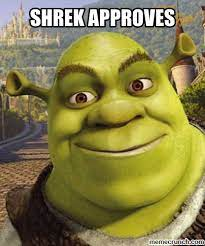